In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pb

In [4]:
a = pd.read_csv("/Users/neelsheth/Downloads/Salary.csv")
a.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
a.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


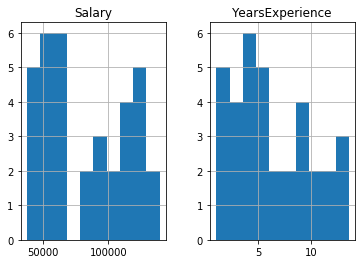

In [7]:
grp = a[['YearsExperience','Salary']]
a.hist()
plt.show()

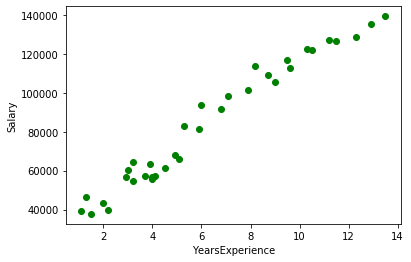

In [9]:
plt.scatter(a.YearsExperience,a.Salary,color = 'green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [10]:
split = np.random.rand(len(a)) < 0.7
train = a[split]
test = a[~split]

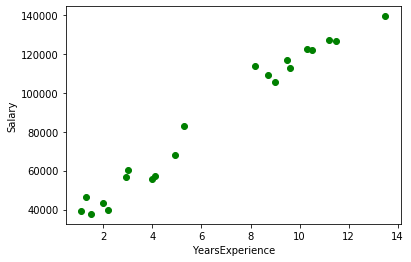

In [11]:
plt.scatter(train.YearsExperience,train.Salary,color = 'green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
trainX = np.asanyarray(train[['YearsExperience']])
trainY = np.asanyarray(train[['Salary']])
reg.fit(trainX,trainY)

print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[8867.87306726]]
Intercept:  [28223.36414603]


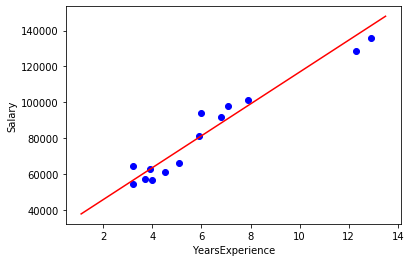

In [13]:
plt.scatter(test.YearsExperience, test.Salary,  color='blue')
plt.plot(trainX, reg.coef_[0][0]*trainX + reg.intercept_[0], '-r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_hat = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 5540.04
Residual sum of squares (MSE): 41338191.69
R2-score: 0.94
